Last modified Jul. 4, 2020 by Luis Valdivia

# 1.

First we need to code the combination formula, $n$ choose $k$. Then, we code the general function for the Bernstein polynomial of $f$ of degree $n$, evaluated at $x$.

In [77]:
import math

# INPUT: two natural numbers n and k
# OUTPUT: n choose k
def nCk(n,k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n-k)

# INPUT: a function f, a natural number n, a real number x
# OUTPUT: the Bernstein polynomial of f of degree n, evaluated at x
def ben(f, n, x):
    sum = 0
    for k in range(n+1):
        sum += f(k/n) * nCk(n,k) * (x**k) * ((1 - x)**(n-k))
    return sum


Now, we code the particular function $f$ we will be using.

In [60]:
def f(x):
    if x < 0.5:
        return x
    if x >= 0.5:
        return 1 - x

We can calculate $E_n = \max_{0 \leq x \leq 1} || f(x) - B_nf(x) ||_{\infty}$ for a variety of $n$'s(since we can't realistically test every $x$, we are just testing a select few). We will double the $n$'s each time and compare each subsequent ratio. 

In [94]:
e = []
for n in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    x = []
    for i in range(n+1):
        x.append(abs(f(i/n) - ben(f, n, i/n))) 
    e.append(max(x)) # this is E_n

# then we calculate the ratios and observe them
for i in range(len(e) - 1): 
    print(e[i]/ e[i + 1])

1.3333333333333333
1.3714285714285714
1.3923853923853924
1.4032204910228396
1.4087016315244514
1.4114543183900252
1.4128331931309048
1.4135232000386646


Notice that these numbers seem to approximate $\sqrt{2}$. Since we were doubling $n$ each time, the rate of convergence should be $\log_2(\sqrt{2}) = \frac{1}{2}$ order, or $O(n^{\frac{1}{2}})$.

# 2.

In [1]:
import matplotlib.pyplot as plt 
from numpy import array

In [75]:
# INPUT: the three points p_0 = (a,b), p_1 = (c,d), p_2 = (e,f)
#        along with how many intervals n we want to partition t = [0,1] into
# OUTPUT: the Bezier curve connecting p_0 and p_2, with bend controlled by p_1
def bez_graph(a,b,c,d,e,f,n):
    # stores the points as arrays so we can perform vector operations
    p_0 = array([a,b])
    p_1 = array([c,d])
    p_2 = array([e,f])
    # two empty lists for storing coordinates
    x = []
    y = []
    # from 2.21, the parametric form used for plotting the Bezier curve
    for t in range(n+1):
        q = ((1 - t/n)**2 * p_0) + (2 * (t/n) * (1 - t/n) * p_1) + ((t/n)**2 * p_2)
        x.append(q[0])
        y.append(q[1])
    # plotting the points  
    plt.plot(x, y, color = 'blue') 
    # rescaling axes 
    plt.ylim(-10,90) 
    plt.xlim(-15,21)

In order for the curve to be $C^1$, we need all points of the second curve, and $p_0$ and $p_1$ from the third curve to be on the line going through $p_1$ and $p_2$ of the first curve. Using the point-slope formula yields that these points should all be on the line $y=20x-20.$

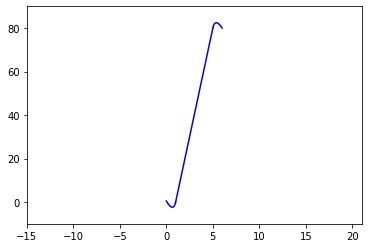

In [76]:
bez_graph(0,0.5,0.75,-5,1,0,200)
bez_graph(1,0,3,40,5,80,200)
bez_graph(5,80,5.25,85,6,80,200)

# 3.

Let $p_1,p_2 \in W$ be best approximations of $f \in V$. Then

$$||f-p_1|| = ||f-p_2|| \leq ||f-p||$$

for all $p \in W$. Let $\lambda \in (0,1)$. Since $W$ is closed under addition and scalar multiplication, $\lambda p_1 + (1 - \lambda)p_2 \in W$. So we need just prove that it is also a best approximations of $f \in V$. Since $\lambda p_1 + (1 - \lambda)p_2 \in W$, it follows that $||f-p_1|| \leq ||f-\lambda p_1 - (1 - \lambda)p_2||$, so we want to prove that 
$||f-p_1|| \geq ||f-\lambda p_1 - (1 - \lambda)p_2||$.

Since $\lambda$ is a scalar, we can factor it out, and then add and subtract $f$ within the norm as follows,

$$ ||f-\lambda p_1 - (1 - \lambda)p_2|| 
= \lambda \bigg|\bigg| \frac{1}{\lambda} f - p_1 - \frac{1-\lambda}{\lambda}p_2\bigg|\bigg|
= \lambda \bigg|\bigg| f - p_1 + \frac{1}{\lambda} f - f - \frac{1-\lambda}{\lambda}p_2\bigg|\bigg|$$
$$ = \lambda \bigg|\bigg| f - p_1 + \frac{1 - \lambda}{\lambda} f - \frac{1-\lambda}{\lambda}p_2\bigg|\bigg|
= \lambda \bigg|\bigg| f - p_1 + \frac{1 - \lambda}{\lambda} (f - p_2) \bigg|\bigg|.$$

Then by the triangle inequality,

$$\lambda \bigg|\bigg| f - p_1 + \frac{1 - \lambda}{\lambda} (f - p_2) \bigg|\bigg| \leq 
\lambda \bigg( ||f - p_1|| +  \frac{1 - \lambda}{\lambda} ||f - p_2|| \bigg)$$
$$ = \lambda||f - p_1|| +  (1 - \lambda)||f - p_2||. $$

Recall that $||f-p_1|| = ||f-p_2||$, so

$$\lambda||f - p_1|| +  (1 - \lambda)||f - p_2|| 
= \lambda||f - p_1|| +  (1 - \lambda)||f - p_1||
= ||f - p_1||.$$

Therefore, $ ||f-\lambda p_1 - (1 - \lambda)p_2|| \leq ||f-p_1||$, which implies $ ||f-\lambda p_1 - (1 - \lambda)p_2|| = ||f-p_1||$, hence $\lambda p_1 + (1 - \lambda)p_2$ is a best approximation and the set of best approximations of $f$ in $W$ is convex.


# 4.
# a.

Notice that $f(x) = \sin(2x)$ is continuous on $[0,2\pi]$. Thus, we can apply Chebyshev's Equioscillation Theorem to state that $p_2 \in \mathbb{P}_2$ is a best uniform approximation of $f$ if and only if there are at least 4 points where the error $e_2 = f - p_2$ equioscillates between the values $\pm||e_2||_{\infty}$. Furthermore, by Theorem 6, this is unique.

We claim that $p_2$ is the zero polynomial. To prove such claim, we need just show the second part of the if statement. We can calculate

$$ \pm||e_2||_{\infty} = \pm||\sin(2x)||_{\infty} = \pm 1.$$

This happens exactly 4 times, at $x = \frac{\pi}{4},\frac{3\pi}{4},\frac{5\pi}{4},\frac{7\pi}{4}$. Since we have found 4 points where the error equioscillates between the values $\pm 1$, we have found the best uniform approximation of $f$.


# b.

Since $f$ is continuous on a compact domain, it attains a maximum and a minimum. Furthermore, since $f$ is continuous, we can apply Chebyshev's Equioscillation Theorem to state that $p_0 \in \mathbb{P}_0$ is a best uniform approximation of $f$ if and only if there are at least 2 points where the error $e_0 = f - p_0$ equioscillates between the values $\pm||e_0||_{\infty}$. By Theorem 6, this is unique. We claim that the best uniform approximation to $f$ by a constant is 

$$ p_0 = \frac{\max_{x\in[a,b]} f + \min_{x\in[a,b]} f}{2}. $$

Then, we calculate

$$ \pm||e_0||_{\infty} = \pm||f - p_0||_{\infty} = \pm\bigg|\bigg|f - \frac{\max_{x\in[a,b]} f + \min_{x\in[a,b]} f}{2}\bigg|\bigg|_{\infty} = \frac{ \mp \max_{x\in[a,b]} f \pm \min_{x\in[a,b]} f}{2}.$$

This happens whenever $f$ attains its maximum or its minimum on $[a,b]$. Since we know these two events are guaranteed to occur, we have found the best uniform approximation of $f$.


# 5.

To prove that a best approximation to $f$ is not unique, we need just find two. We can rewrite $W = span\{(0 \; 1 \; 0)^T,(0 \; 0 \; 1)^T\}$ as $W = \{(0 \; y \; z)^T \mid y,z \in \mathbb{R}\}$. Then we can calculate

$$ || (0 \; y \; z)^T - (3 \; 6 \; 4)^T||_{\infty} = | (-3 \;\; y - 6 \;\; z - 4)^T||_{\infty} = \max \{3, |y-6|, |z-4|\}.$$

Notice that we can only change the second and third values, and that we can make them smaller than 3. Since we can't change 3, it is the smallest value that the norm can achieve. Then, if we choose $y = 6$ and $z = 4$, we get the norm to be 3. Similarly, for $y = 5$ and $z = 4$, we get the norm to be 3. So we have found that $(0,6,4)$ and $(0,5,4)$ are best approximations, hence a best approximation to $f$ is not unique. 


# 6.

We want to show that $\{T_j \mid j = 0, \dots, n\}$ is a basis for $\mathbb{P}_n$ because that implies that any $p \in \mathbb{P}_n$ is a linear combination of such $T_j$'s. Recall that the standard basis for $\mathbb{P}_n$ is $B = \{x^j \mid j = 0, \dots, n\}$. Using such basis, we can write each $T_j$ as a vector with at most $j+1$ non-zero entries. Then we consider the matrix

$$ [[T_0]_B \; \cdots \; [T_n]_B] = 
\begin{bmatrix}
1 & 0 & \dots & \vdots\\
0 & 1 & \dots & \vdots\\
\vdots & \vdots & \dots & \vdots\\
0 & 0 & \dots & 2^{n-1} 
\end{bmatrix},$$

which is upper-triangular with a non-zero diagonal(notice the values along the diagonal are $2^{j-1}$). Thus, this matrix is invertible. Since the dimension of this matrix is $n+1$ and we have $n+1$ linear independent vectors, these vectors form a basis. 

# 7.
For simplicity, let's consider the interval $[-1,1]$. First we define a function to compute the Chebyshev polynomial of degree $n$ at $x$. Then, we define a function to plot the Chebyshev polynomial of degree $n$ in our desired window.


In [2]:
# INPUT: a real number x and a nonnegative integer n
# OUTPUT: the Chebyshev polynomial of degree n, evaluated at x
def T(x,n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return (2 * x * T(x,n-1) - T(x, n-2))
    
# INPUT: a nonnegative integer n
# OUTPUT: plots the Chebyshev polynomial of degree n in the interval [−1,1] 
def plot_T_n(n):
    x_val = []
    y_val = []
    for t in range(200):
        x_val.append(-1 + (t/100))
        y_val.append(T(-1 + (t/100), n))
    plt.plot(x_val, y_val) 

Now we plot $T_1,T_2,T_3,T_6$.

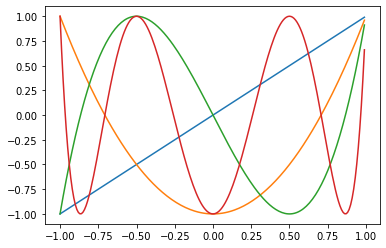

In [3]:
plot_T_n(1)
plot_T_n(2)
plot_T_n(3)
plot_T_n(6)